In [23]:
from useful_scit.imps import *

In [ ]:
lt = "local time"

In [191]:
path = '/Users/diego/flexpart_management/flexpart_management/releases/v03/data/cluster_series_v3.nc'

In [192]:
ds = xr.open_dataset(path)

In [194]:
c45_path = '/Users/diego/flexpart_management/flexpart_management/notebooks/george_paper/c45_timeseries.xlsx'
da = pd.read_excel(c45_path)

In [196]:
da[lt] = pd.to_datetime(da['Time_LT'],format='%d/%m/%Y %H:%M:%S')

In [197]:
da[lt]

0      2018-01-06 12:00:00.000
1      2018-01-06 12:10:00.000
2      2018-01-06 12:20:00.000
3      2018-01-06 12:30:00.000
4      2018-01-06 12:40:00.000
                 ...          
2803   2018-01-25 23:10:00.001
2804   2018-01-25 23:20:00.001
2805   2018-01-25 23:30:00.001
2806   2018-01-25 23:40:00.001
2807   2018-01-25 23:50:00.001
Name: local time, Length: 2808, dtype: datetime64[ns]

In [199]:
da1 = da.set_index(lt).drop('Time_LT',axis=1)

In [200]:
da2 = da1.resample('h').mean()

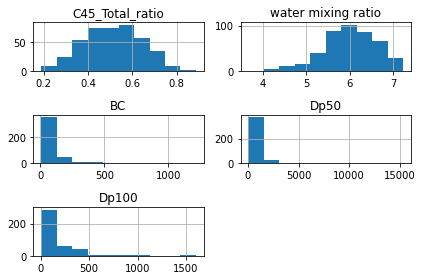

In [206]:
da2.hist();
plt.gcf().tight_layout()

In [207]:

d = ds.loc[{'normalized':0}]
d[lt] = d['releases'] - pd.Timedelta(hours=3.5)
d = d.swap_dims({'releases':lt})

In [208]:
ts = slice('2018-01-10 10','2018-01-12 12')

In [209]:
d1 = d.loc[{lt:ts}]['conc_lab_nc18']

In [210]:
d1

<xarray.DataArray 'conc_lab_nc18' (lab_nc18: 18, z_column: 3, local time: 51)>
array([[[9.948335e+03, 7.654071e+03, ..., 2.439578e-01, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]],

       [[7.462913e+02, 2.681876e+03, ..., 1.134662e+04, 8.571737e+03],
        [7.426972e+02, 2.674893e+03, ..., 1.063914e+04, 8.083169e+03],
        [2.070410e+02, 1.262359e+03, ..., 5.993285e+03, 3.902404e+03]],

       ...,

       [[5.304399e+02, 5.319892e+02, ..., 8.311807e-01, 8.188468e+00],
        [1.484667e+02, 1.395074e+02, ..., 7.246214e-01, 7.852529e+00],
        [5.757406e+01, 5.734075e+01, ..., 7.200000e-02, 1.751169e+00]],

       [[1.002100e+04, 1.520968e+04, ..., 2.324187e+04, 2.208806e+04],
        [5.875836e+03, 1.114335e+04, ..., 2.192511e+04, 2.066082e+04],
        [1.697491e+03, 5.804968e+03, ..., 1.565564e+04, 1.259188e+04]]])
Coordinates:
    normalized  int64 0
  * z_column    (z_column) object 'ALL' 'BL' 'LEV0'
    releases    (local time) datetime64[ns] 2018-01-10T14:00:00 ... 2018-01-1...
  * lab_nc18    (lab_nc18) object '08_LR' '12_SR' '10_SR' ... '08_SM' '02_SR'
  * local time  (local time) datetime64[ns] 2018-01-10T10:30:00 ... 2018-01-1...
Attributes:
    short name:    SRR
    long name:     SRR
    type:          variable
    descritption:  SRR either normalized or not.

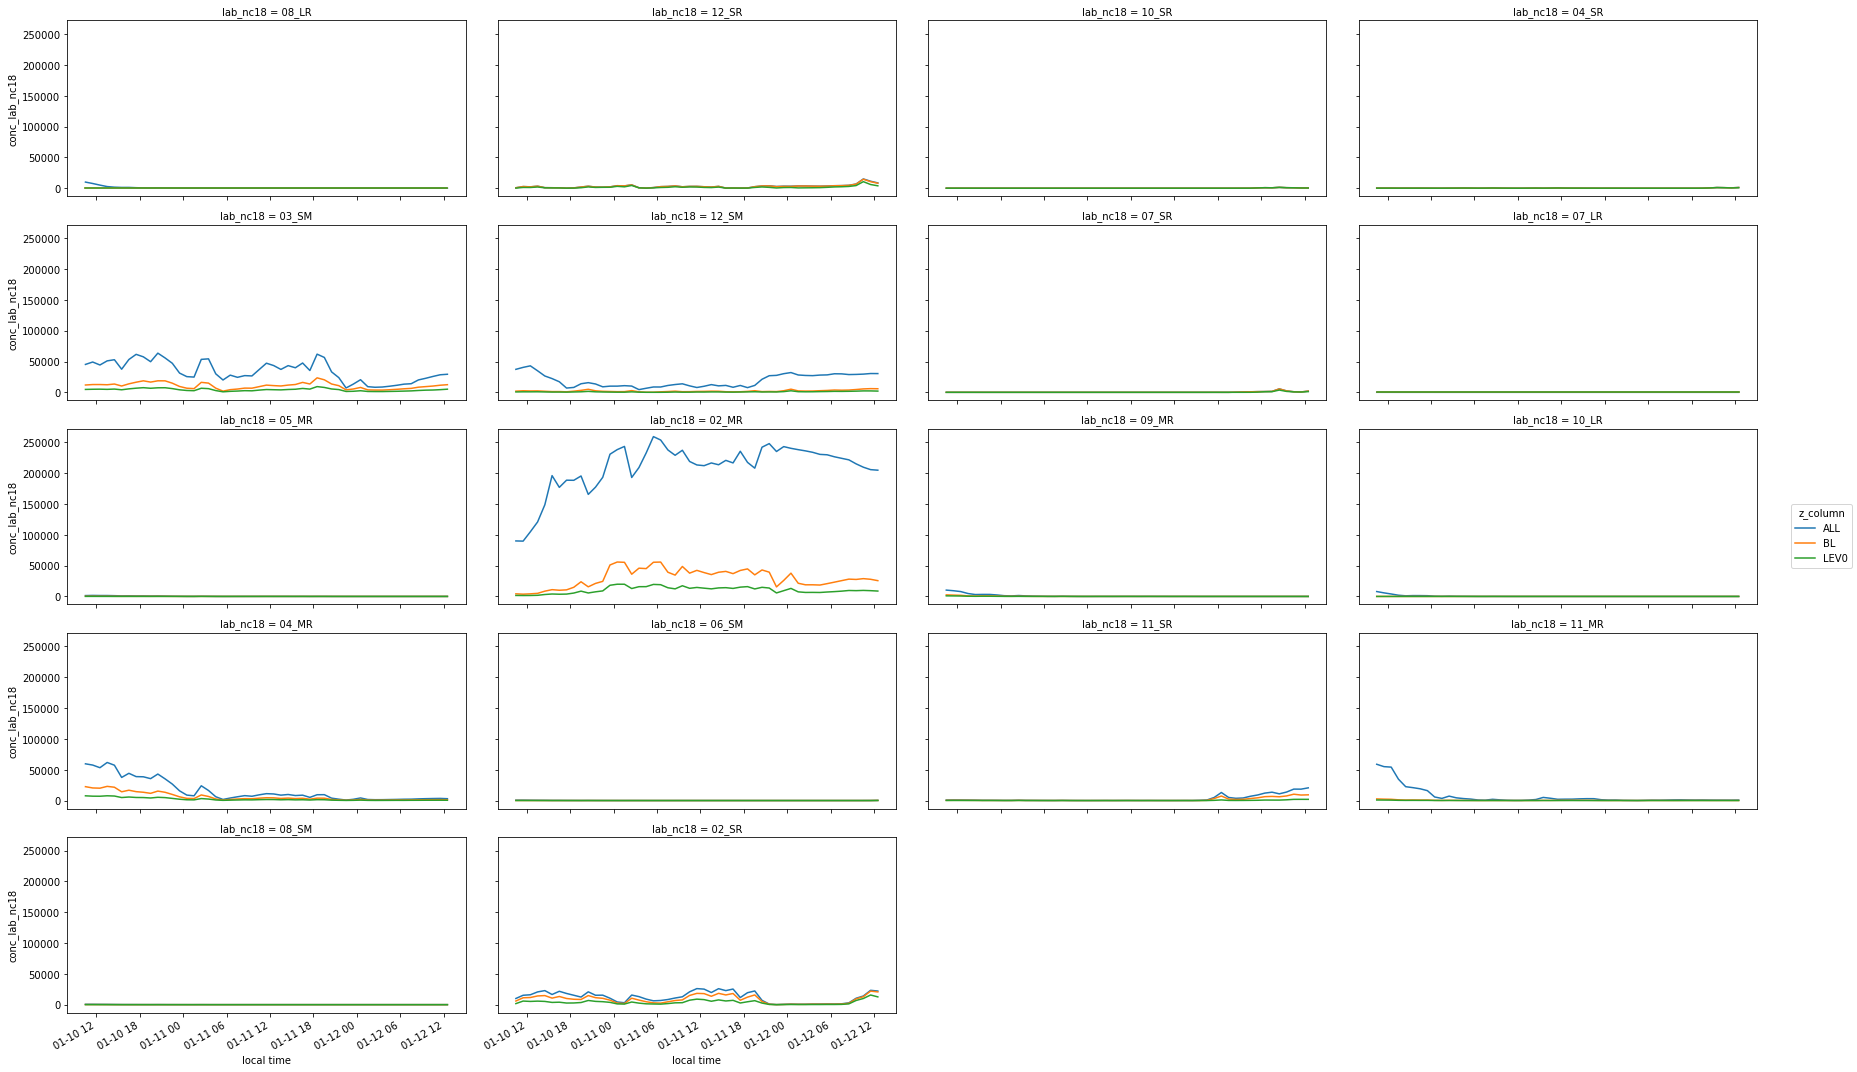

In [153]:
d1.plot.line(x=lt,col='lab_nc18',hue='z_column',
#              sharey=False,
             col_wrap=4,aspect=2
            )

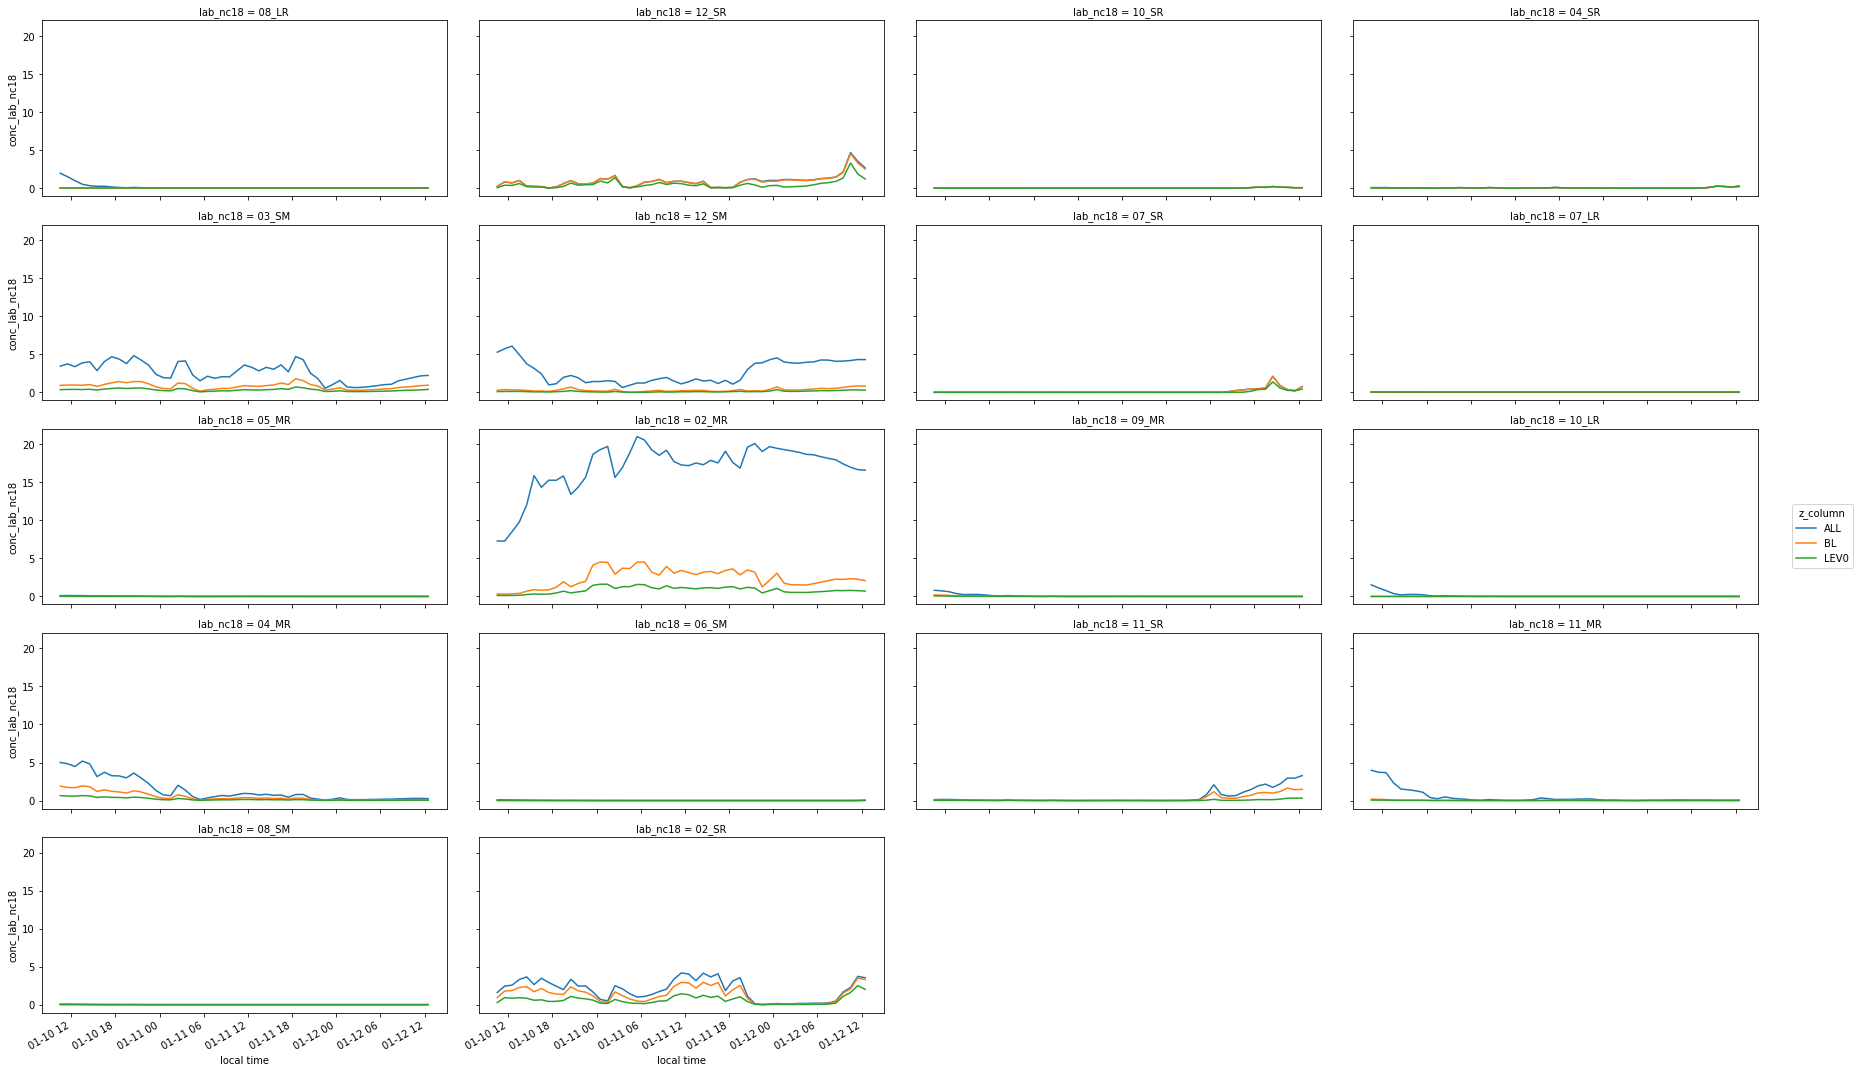

In [154]:
(d1/d['conc_lab_nc18'].mean([lt,'z_column'])).plot.line(x=lt,col='lab_nc18',hue='z_column',
#              sharey=False,
             col_wrap=4,aspect=2
            )

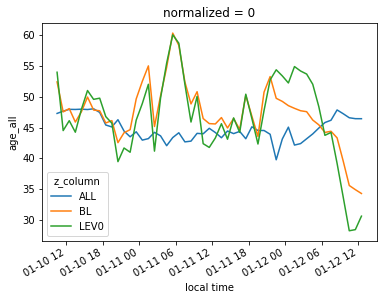

In [155]:
d.loc[{lt:ts}]['age_all'].plot(x=lt,hue='z_column')

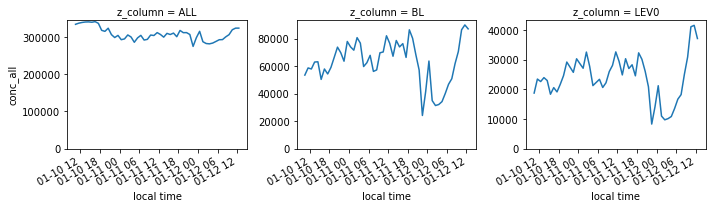

In [156]:
d.loc[{lt:ts}]['conc_all'].plot(x=lt,col='z_column',sharey=False,ylim=(0,None))

In [157]:
d['lab_nc18']

<xarray.DataArray 'lab_nc18' (lab_nc18: 18)>
array(['08_LR', '12_SR', '10_SR', '04_SR', '03_SM', '12_SM', '07_SR', '07_LR',
       '05_MR', '02_MR', '09_MR', '10_LR', '04_MR', '06_SM', '11_SR', '11_MR',
       '08_SM', '02_SR'], dtype=object)
Coordinates:
    normalized  int64 0
  * lab_nc18    (lab_nc18) object '08_LR' '12_SR' '10_SR' ... '08_SM' '02_SR'
Attributes:
    short name:    label 18 CL
    long name:     label 18 clusters
    type:          dimension
    descritption:  labels for the 18th clusters

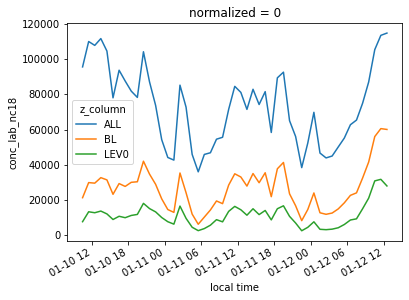

In [164]:
SR = ['12_SR', '10_SR', '04_SR','07_SR','11_SR', '02_SR']
SM = ['03_SM', '12_SM' ,'06_SM', '08_SM']
d2 = d1.loc[{'lab_nc18':[*SR,*SM]}]
d2.sum('lab_nc18').plot(hue='z_column')

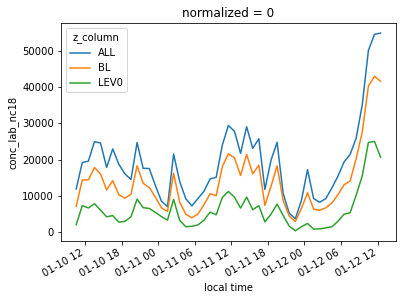

In [165]:
d2 = d1.loc[{'lab_nc18':[*SR]}]
d2.sum('lab_nc18').plot(hue='z_column')